In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles. Set page results per age to max. Sort by most relevant 
btc_articles = newsapi.get_everything(q='Bitcoin OR BTC OR btc', page_size=100, sort_by="relevancy", language='en')
#btc_articles

In [5]:
# Fetch the Ethereum news articles Set page results per age to max. Sort by most relevant 
eth_articles = newsapi.get_everything(q='Ethereum OR ETH OR eth',page_size=100, sort_by="relevancy", language='en')
#eth articles

In [35]:
# Create the Bitcoin sentiment scores DataFrame

# Create list object to house sentiment scores
btc_sentiment_scores = []

# run for loop to obtain sentiment score for each article 
for article in btc_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])

# compile sentiment scores
        btc_sentiment_scores.append({
            "text": article["description"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# create DF
btc_df = pd.DataFrame(btc_sentiment_scores, columns=['Compound','Negative','Neutral','Positive','text'])
btc_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...
1,0.6357,0.043,0.834,0.124,Here are six more reasons why BTC is going to ...
2,-0.3400,0.070,0.930,0.000,"BITCOIN ($ BTC) was introduced by ""Satoshi Nak..."
3,0.0000,0.000,1.000,0.000,Bitcoin remains the undisputed blockchain indu...
4,0.5267,0.000,0.914,0.086,Fifteen years after Twitter CEO Jack Dorsey se...


In [7]:
# Create the ethereum sentiment scores DataFrame

# Create list object to house sentiment scores
eth_sentiment_scores = []

# run for loop to obtain sentiment score for each article 
for article in eth_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
        
# compile sentiment scores
        eth_sentiment_scores.append({
            "text": article["description"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# create DF
eth_df = pd.DataFrame(eth_sentiment_scores, columns=['Compound','Negative','Neutral','Positive','text'])
eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.3041,0.145,0.761,0.094,We don’t need the next big thing. We need coun...
1,0.7579,0.000,0.817,0.183,There are several straightforward approaches f...
2,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...
3,0.4019,0.000,0.920,0.080,Update: Two german publications have now confi...
4,0.4019,0.000,0.909,0.091,"Summary List PlacementSquare, Fidelity, Coinba..."


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.161794,0.021650,0.919730,0.058630
std,0.360456,0.041605,0.074897,0.066066
min,-0.757900,0.000000,0.660000,0.000000
25%,0.000000,0.000000,0.872500,0.000000
50%,0.025800,0.000000,0.925500,0.053000
75%,0.476700,0.009500,1.000000,0.091750
max,0.908000,0.178000,1.000000,0.340000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.140588,0.029920,0.904370,0.065700
std,0.397750,0.051322,0.079228,0.068973
min,-0.910000,0.000000,0.688000,0.000000
25%,-0.000375,0.000000,0.847000,0.000000
50%,0.077200,0.000000,0.920000,0.059500
75%,0.462950,0.061250,0.959500,0.097750
max,0.850600,0.299000,1.000000,0.270000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH - 0.0655

Q: Which coin had the highest compound score?

A: BTC - 0.9080

Q. Which coin had the highest positive score?

A: BTC - 0.349

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary

# review default stopwords
print(stopwords.words('english'))

# add in some extra words based upon results discovered in subsequent cells
sw_addons = {'thing,','dont','seems','like','said','ha','wa'}


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
lemmatizer = WordNetLemmatizer()

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))

    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")

    # Remove the punctuation
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
        
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [13]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, happened, purchase, tesla, vehicl..."
1,0.6357,0.043,0.834,0.124,Here are six more reasons why BTC is going to ...,"[six, reason, btc, going, keep, moving, higher..."
2,-0.3400,0.070,0.930,0.000,"BITCOIN ($ BTC) was introduced by ""Satoshi Nak...","[bitcoin, btc, introduced, satoshi, nakamoto, ..."
3,0.0000,0.000,1.000,0.000,Bitcoin remains the undisputed blockchain indu...,"[bitcoin, remains, undisputed, blockchain, ind..."
4,0.5267,0.000,0.914,0.086,Fifteen years after Twitter CEO Jack Dorsey se...,"[fifteen, year, twitter, ceo, jack, dorsey, se..."


In [14]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.3041,0.145,0.761,0.094,We don’t need the next big thing. We need coun...,"[need, next, big, thing, need, countless, next..."
1,0.7579,0.000,0.817,0.183,There are several straightforward approaches f...,"[several, straightforward, approach, maximizin..."
2,0.3612,0.000,0.933,0.067,It seems like everyone is making money off of ...,"[everyone, making, money, nfts, nonfungible, t..."
3,0.4019,0.000,0.920,0.080,Update: Two german publications have now confi...,"[update, two, german, publication, confirmed, ..."
4,0.4019,0.000,0.909,0.091,"Summary List PlacementSquare, Fidelity, Coinba...","[summary, list, placementsquare, fidelity, coi..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

#set 'n' variable for ngram 
n = 2

#create function to process text and execute ngram counter
def ngram_counter(df): 
    text_string = ' '.join(df.text)
    processed = tokenizer(text_string)
    ngram = Counter(ngrams(processed,n=n))
    print(dict(ngram.most_common(20)))
    return

#run ngram counter function
ngram_counter(btc_df)

{('elon', 'musk'): 8, ('digital', 'currency'): 8, ('record', 'high'): 6, ('summary', 'list'): 5, ('cryptocurrency', 'market'): 5, ('high', 'hit'): 4, ('wealth', 'management'): 4, ('buy', 'tesla'): 3, ('billion', 'bitcoin'): 3, ('data', 'center'): 3, ('bitcoin', 'mining'): 3, ('new', 'feature'): 3, ('alltime', 'high'): 3, ('securities', 'exchange'): 3, ('exchange', 'commission'): 3, ('pay', 'million'): 3, ('earlier', 'month'): 3, ('management', 'client'): 3, ('holdings', 'inc'): 3, ('moscow', 'near'): 3}


In [17]:
# Generate the Ethereum N-grams where N=2

#set ngram varible
n=2

#run ngram counter function
ngram_counter(eth_df)


{('nonfungible', 'token'): 11, ('summary', 'list'): 8, ('digital', 'currency'): 6, ('bitcoin', 'ethereum'): 5, ('usd', 'coin'): 4, ('jack', 'dorsey'): 4, ('first', 'tweet'): 4, ('million', 'dollar'): 4, ('fungible', 'token'): 4, ('latest', 'sign'): 4, ('token', 'nfts'): 4, ('use', 'cryptocurrency'): 4, ('payment', 'network'): 4, ('nft', 'craze'): 3, ('twitter', 'bos'): 3, ('bos', 'jack'): 3, ('dorsey', 'sold'): 3, ('sold', 'first'): 3, ('tweet', 'nft'): 3, ('nft', 'million'): 3}


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
btc_string = ' '.join(btc_df.text)
btc_processed = tokenizer(btc_string)

btc_top_10 = token_count(btc_processed)
btc_top_10 

[('bitcoin', 67),
 ('cryptocurrency', 27),
 ('tesla', 19),
 ('digital', 17),
 ('high', 12),
 ('trading', 12),
 ('financial', 11),
 ('market', 11),
 ('elon', 10),
 ('year', 10)]

In [20]:
# Get the top 10 words for Ethereum
eth_string = ' '.join(eth_df.text)
eth_processed = tokenizer(eth_string)

eth_top_10 = token_count(eth_processed)
eth_top_10 

[('nft', 22),
 ('digital', 21),
 ('nfts', 19),
 ('token', 19),
 ('cryptocurrency', 19),
 ('ethereum', 18),
 ('bitcoin', 16),
 ('crypto', 15),
 ('million', 15),
 ('new', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

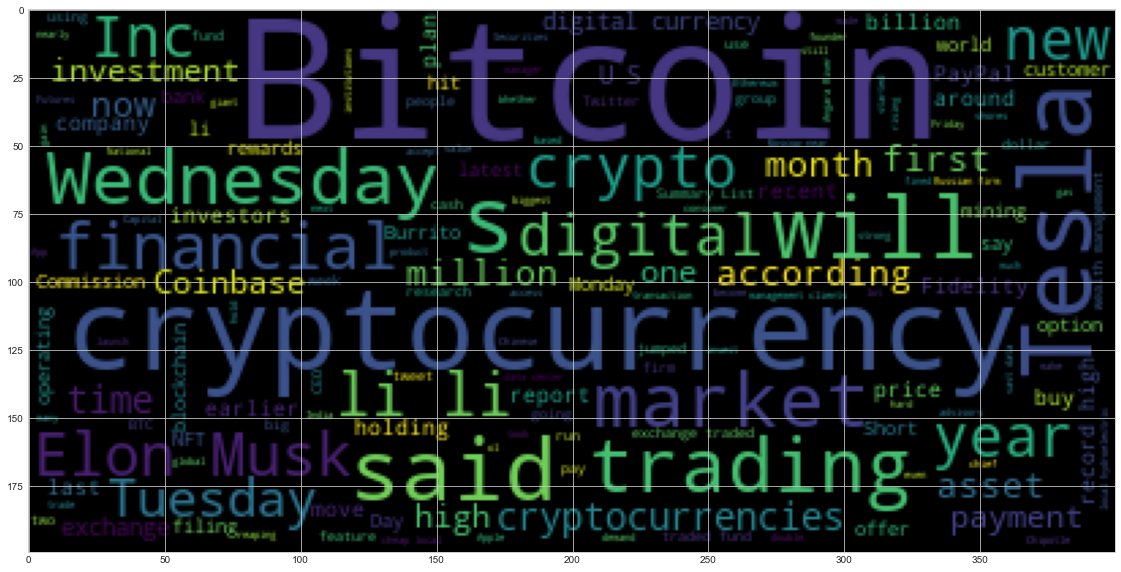

In [22]:
# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(btc_string)
plt.imshow(img);

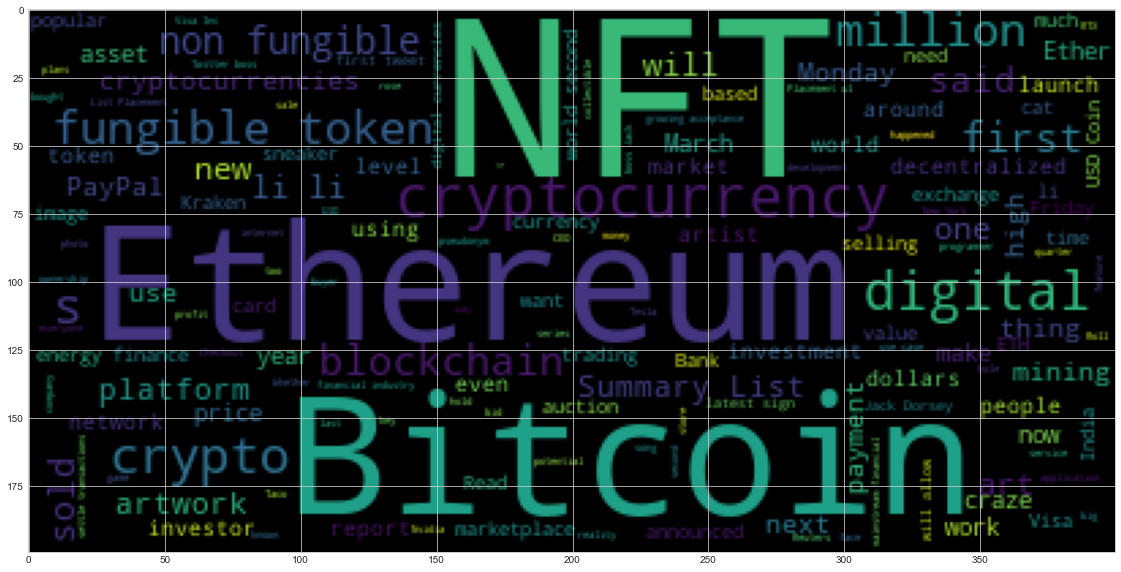

In [23]:
# Generate the Ethereum word cloud
img = wc.generate(eth_string)
plt.imshow(img);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [26]:
# Concatenate all of the bitcoin text together
btc_string

'The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\n\nYou can now buy a Tesla with Bitcoin\r\n\n— Elon Musk (@elonmusk) March 24, 2021\r\n\n\r\n\nTe… Here are six more reasons why BTC is going to keep moving higher and where we think it is heading. BITCOIN ($ BTC) was introduced by "Satoshi Nakamoto", alias of a programmer or group of programmers whose motivation for its development was the economic crisis of 2008 - 2009. Bitcoin remains the undisputed blockchain industry leader, but as the major banks and investment funds accumulate BTC, retail investors always try to find the next big thing. Fifteen years after Twitter CEO Jack Dorsey sent the world’s first tweet, the message has sold for nearly $3 million as an NFT. <ol><li>Chipotle Bitcoin Giveaway Offers $200K in Burritos and BTC - CoinDesk\xa0\xa0CoinDesk\r\n</li><li>Chipotle giving away $100K in Bitco

In [27]:
# Run the NER processor on all of the text
doc = nlp(btc_string)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [28]:
# Render the visualization
displacy.render(doc,style='ent')

In [29]:
# List all Entities
NER_types = [ent.text for ent in doc.ents if ent.label_ in ['GPE','ORG','PERSON']]
print(NER_types)

['Tesla', 'Elon Musk', 'Elon Musk', 'BTC', 'Bitcoin', 'BTC', 'Jack Dorsey', 'NFT', 'CoinDesk', 'Bitcoin\xa0\xa0', 'Cheap Burritos', 'National Burrito Day', 'Lifehacker', 'Fidelity, Coinbase', 'Bitcoin Magazine', '>Elon Musk', 'Tesla Cybertruck', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Chad Seaman Executive', 'Bitcoin', 'Tesla', 'Bitcoin', 'Tesla', 'Elon Musk', 'SEC', 'National Burrito Day', 'India', 'Bitcoin or Ethereum', 'Graham Ivan Clark', 'Twitter’s', 'Bitcoin', 'GameStop’s', 'India', 'Reuters', 'India', 'Bitcoin’s', 'Funko', 'TokenHead', 'Bobby Lee', 'BTCC', 'the U.S. Securities and Exchange Commission', 'Fidelity', 'Block', 'PayPal', 'Julian Satterthwaite', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'Regulators', 'Coinbase', 'Elon Musk', 'Tesla', 'Bitcoin', 'the United States', 'Bitcoin', 'Peter Schiff', 'NFT', 'White House', 'Anthony Scaramucci', 'SkyBridge Capital', 'First Trust Advisors', 'the Securities and Exchange Commission', 'Bitcoin\xa0\xa0', 'Apple', 'UK', 'MobileSyrup', 'Apple’s A

---

## Ethereum NER

In [30]:
# Concatenate all of the ethereum text together
eth_string

'We don’t need the next big thing. We need countless next little things. There are several straightforward approaches for maximizing the potential of decentralized finance and open-banking tools. It seems like everyone is making money off of NFTs, or non-fungible tokens, those digital artworks that have been labeled the next investment mania. Everyone, that is, except for you. It’s the same feeling you had when you realized GameStop’s stock was a thin… Update: Two german publications have now confirmed Ethereum mining limiter can be removed simply by using a special driver. NVIDIA GeForce RTX 3060 Ethereum mining restrictions have been broken The editorial team from PC Watch confirms that a hack developed b… Summary List PlacementSquare, Fidelity, Coinbase, and other financial institutions announced on Tuesday the formation of a group meant to boost the potential of cryptocurrencies by educating policymakers, regulators, institutions, and individual investors on … fahrbot-bot shares a 

In [31]:
# Run the NER processor on all of the text
doc = nlp(eth_string)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [32]:
# Render the visualization
displacy.render(doc,style='ent')

In [33]:
# List all Entities
NER_types = [ent.text for ent in doc.ents if ent.label_ in ['GPE','ORG','PERSON']]
print(NER_types)

['GameStop’s', 'Ethereum', 'NVIDIA GeForce', 'Fidelity, Coinbase', 'Electrek', 'ETH Zurich', 'Empa', 'Tesla', 'Elon Musk', 'Elon Musk', 'NFT', 'Bitcoin', 'BTC', 'India', 'Bitcoin or Ethereum', 'Ethereum', 'Bitcoin, Ethereum', 'Bitcoin Cash', 'Kraken', 'Kraken', 'Visa', 'USD Coin', 'Ethereum', 'Crypto.com', 'Visa', 'USDC', 'Richard D. James', 'ETH', 'NFT', 'Ethereum', 'Roll', 'Bitcoin', 'South Korea', 'Kimchi Premium', 'Kimchi Premium', 'Bitcoin', 'Mashable Video', 'Nft OpenSea', 'NFT', "Christie's", 'Metakovan', "Christie's", 'Metakovan', 'Ethereum', 'Contribute', 'Defi-Cartel', 'GitHub', 'Mike Novogratz', 'Digital', 'Jack Dorsey', 'NFT', 'Jack Dorsey', 'NFT', 'Jack Dorsey', 'NFT', 'Dorsey', 'NFT', 'List PlacementIn', 'Grayscale Investments', 'Banks', 'Ripps', 'NFT', 'Paris', 'Hilton', 'Lindsay Lohan', 'Rob Gronk', 'Rafael Yuste', "New York's", 'Columbia University', 'DOOM', 'NFT', 'NFT', 'Viktor Vaughn', 'Gridcoin', 'Rob Halförd', 'NFT', 'FinTech', 'Virtual', 'Hong Kong', 'Meitu Inc',